# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camacha
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | saint-georges
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | lalmohan
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | sinnamary
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | charkhi dadri
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | viedma
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | james

Processing Record 36 of Set 4 | abu kamal
Processing Record 37 of Set 4 | ledyard
Processing Record 38 of Set 4 | nyurba
Processing Record 39 of Set 4 | abonnema
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | askiz
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | tonantins
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | rio tercero
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | cherskiy
Processing Record 0 of Set 5 | polovinnoye
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | belaya gora
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | bokovskaya
Processing Record 6 of Set 5 | diamantino
Processing Record 7 of Set 5 | okakarara
Processing Record 8 of Set 5 | kieta
Processing Record 9 of Set

Processing Record 23 of Set 8 | trelew
Processing Record 24 of Set 8 | dunedin
Processing Record 25 of Set 8 | ordzhonikidze
Processing Record 26 of Set 8 | yarada
Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | kalabo
Processing Record 30 of Set 8 | kumsi
Processing Record 31 of Set 8 | san andres
Processing Record 32 of Set 8 | coihueco
Processing Record 33 of Set 8 | oytal
Processing Record 34 of Set 8 | kayes
Processing Record 35 of Set 8 | omboue
Processing Record 36 of Set 8 | dom pedrito
Processing Record 37 of Set 8 | metro
Processing Record 38 of Set 8 | molchanovo
Processing Record 39 of Set 8 | hurricane
Processing Record 40 of Set 8 | singapore
Processing Record 41 of Set 8 | manokwari
Processing Record 42 of Set 8 | wattegama
Processing Record 43 of Set 8 | bababe
City not found. Skipping...
Processing Record 44 of Set 8 | bonavista
Processing Record 45 of Set 8 | envira
Processing Record 46 of Set 8 | japura


Processing Record 16 of Set 12 | bloomingdale
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | puerto leguizamo
Processing Record 19 of Set 12 | marsaxlokk
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | kortkeros
Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | ahuimanu
Processing Record 24 of Set 12 | ilhabela
Processing Record 25 of Set 12 | perth
Processing Record 26 of Set 12 | lianzhou
Processing Record 27 of Set 12 | plettenberg bay
Processing Record 28 of Set 12 | copiapo
Processing Record 29 of Set 12 | gorele
Processing Record 30 of Set 12 | mokhsogollokh
Processing Record 31 of Set 12 | nantucket
Processing Record 32 of Set 12 | padang
Processing Record 33 of Set 12 | sioux lookout
Processing Record 34 of Set 12 | arti
Processing Record 35 of Set 12 | davila
Processing Record 36 of Set 12 | sadiqabad
Processing Record 37 of Set 12 | pangoa
Processing Record 38 of Set 12 | petropavlovsk-kamchatskiy
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camacha,33.0833,-16.3333,15.68,82,20,1.03,PT,1670270978
1,ushuaia,-54.8000,-68.3000,9.79,49,40,10.29,AR,1670270805
2,cabo san lucas,22.8909,-109.9124,29.78,61,20,4.12,MX,1670270601
3,saint-georges,12.0564,-61.7485,25.97,71,55,4.05,GD,1670270897
4,clyde river,70.4692,-68.5914,-10.87,100,100,1.03,CA,1670270864


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camacha,33.0833,-16.3333,15.68,82,20,1.03,PT,1670270978
1,ushuaia,-54.8000,-68.3000,9.79,49,40,10.29,AR,1670270805
2,cabo san lucas,22.8909,-109.9124,29.78,61,20,4.12,MX,1670270601
3,saint-georges,12.0564,-61.7485,25.97,71,55,4.05,GD,1670270897
4,clyde river,70.4692,-68.5914,-10.87,100,100,1.03,CA,1670270864


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

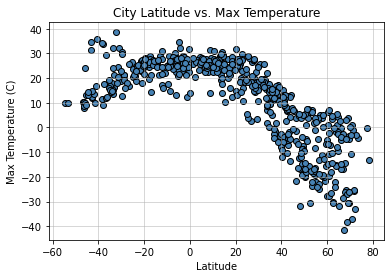

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

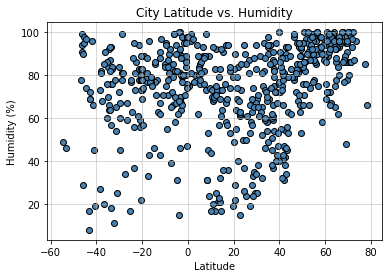

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

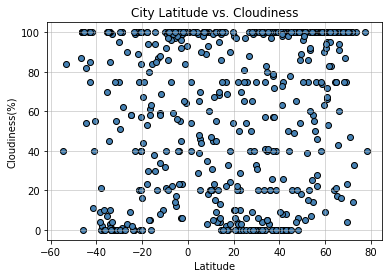

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

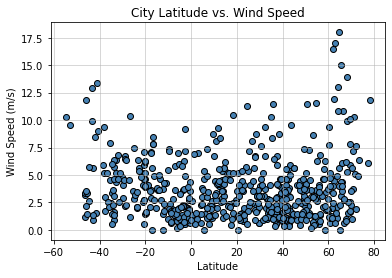

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq
#Define function to annotate regression plot
def annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camacha,33.0833,-16.3333,15.68,82,20,1.03,PT,1670270978
2,cabo san lucas,22.8909,-109.9124,29.78,61,20,4.12,MX,1670270601
3,saint-georges,12.0564,-61.7485,25.97,71,55,4.05,GD,1670270897
4,clyde river,70.4692,-68.5914,-10.87,100,100,1.03,CA,1670270864
7,lalmohan,22.3384,90.7419,20.19,63,0,4.47,BD,1670270979


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,9.79,49,40,10.29,AR,1670270805
5,rikitea,-23.1203,-134.9692,24.15,81,99,6.37,PF,1670270814
6,avarua,-21.2078,-159.7750,23.03,94,20,2.57,CK,1670270857
8,atuona,-9.8000,-139.0333,25.25,75,92,7.37,PF,1670270803
10,carnarvon,-24.8667,113.6333,20.55,77,58,7.46,AU,1670270828


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.693260307432435


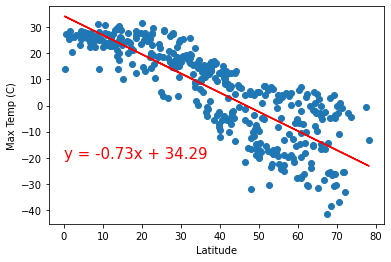

In [15]:
# Linear regression on Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

#Annotate regression
annotate(plot, 0,-20)



The r-value is: 0.2800891327278463


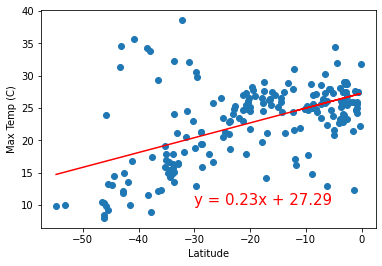

In [16]:
# Linear regression on Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

#Annotate regression
annotate(plot, -30,10)

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a pretty strong correlation between latitude and max temps with an r-value of 0.693, this tells us that as the latitude gets higher our Max Temps drops.
    
In the Southern hemisphere we have a weak correlation between Max Temps and Latitude with an r-value of 0.280, still we see that as latitude increases our Max Temps Rise.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15937618053618105


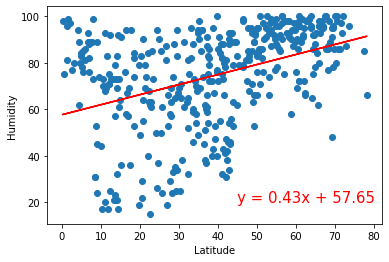

In [17]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Annotate regression
annotate(plot, 45,20)

The r-value is: 0.04199755604033748


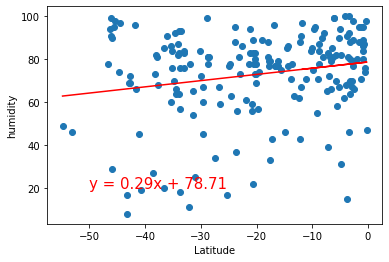

In [18]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("humidity")

#Annotate regression
annotate(plot, -50,20)

**Discussion about the linear relationship:** In the Northern Hemisphere there is not a significant correlation between latitude and humidity with an r-value of 0.159, we can see in the graph that the correlation is there but the results seem to vary with no signifact relationship to each other 

In the Southern hemisphere we no significant correlation with an r-value of 0.042, the graphs dont change much in appearnce once again the correlation can be seen but is weak and many points on the plot dont seem to follow it.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06931972942601745


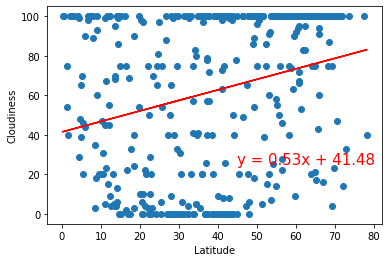

In [19]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Annotate regression
annotate(plot, 45,25)

The r-value is: 0.04911032421639507


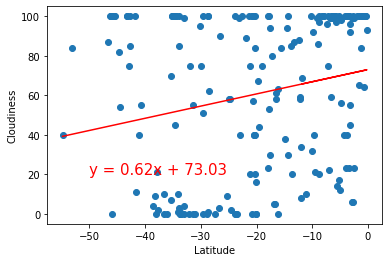

In [20]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Annotate regression
annotate(plot, -50,20)

**Discussion about the linear relationship:** In the Northern Hemisphere there is no correlation between latitude and Cloudiness with an r-value of 0.069.

In the Southern hemisphere there is no significant correlation between latitude and Cloudiness with an r-value of 0.049.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024727381286231753


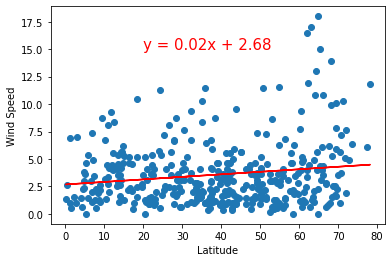

In [24]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Annotate regression
annotate(plot, 20,15)

The r-value is: 0.14255949752841518


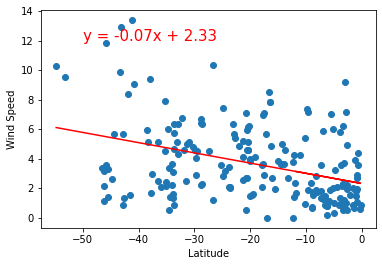

In [23]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Annotate regression
annotate(plot, -50,12)

**Discussion about the linear relationship:** In the Northern Hemisphere there is not a significant correlation between latitude and Wind Speed with an r-value of 0.025, despite that from seeing the graph it seems like in general wind speeds are lower.

In the Southern hemisphere there is a slightly higher correlation but still not significant with an r-value of 0.143.